# Comparison of different clustering algorithms

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, scale_data, load_fuzzy_data
from timeit import default_timer as timer 
from clustertools.models.distance import KMeans, Regspace
from clustertools.models.graph import SpectralClustering
from clustertools.models.density import MeanShift, plot_kde
from clustertools.models.fuzzy import FuzzyCMeans
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
#load fuzzy dataset and pre-process
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]

### Mean Shift Algorithm

In [3]:
def plot_mean_shift(data, labels, bandwidth, outliers): 
 
    f, axarr = plt.subplots(1,3, figsize=(30,10))

    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[0].axis('off')

    axarr[1].scatter(data[:,0],data[:,1],alpha=.6, c = labels, cmap='Set2')
    if outliers >0:
        axarr[1].axis('off')
    else:
        axarr[1].scatter(data[labels==0][:,0],data[labels==0][:,1],s = 100, alpha=.3, marker='*')    
        axarr[1].axis('off')
    
    
    [X, Y, Z] = plot_kde(data[:,0], data[:,1], bandwidth) 
    ma=np.max(np.max(Z)) #max of density
    mi=np.min(np.min(Z)) #min of density
    levels=np.arange(mi,ma+(ma-mi)*0.099,(ma-mi)*0.1) #specify contour levels
    axarr[2].contour(X,Y,Z, levels)
    axarr[2].plot(data[:,0], data[:,1], 'k.', markersize=2, alpha=1)
    axarr[2].axis('off')
    
    axarr[0].set_title('Data points')
    axarr[1].set_title('Clustering')
    axarr[2].set_title('Kernel density estimation')

    plt.show()

101 iterations until termination.
Used bandwidth: 0.230000
Finished after 5.044115996864857
Number of clusters found: 12.000000
There is/are 2.000000 outliers
Max within cluster distance to center: 1.313384
Mean within cluster distance to center: 0.004175
Sum of within cluster squared errors: 3.457955


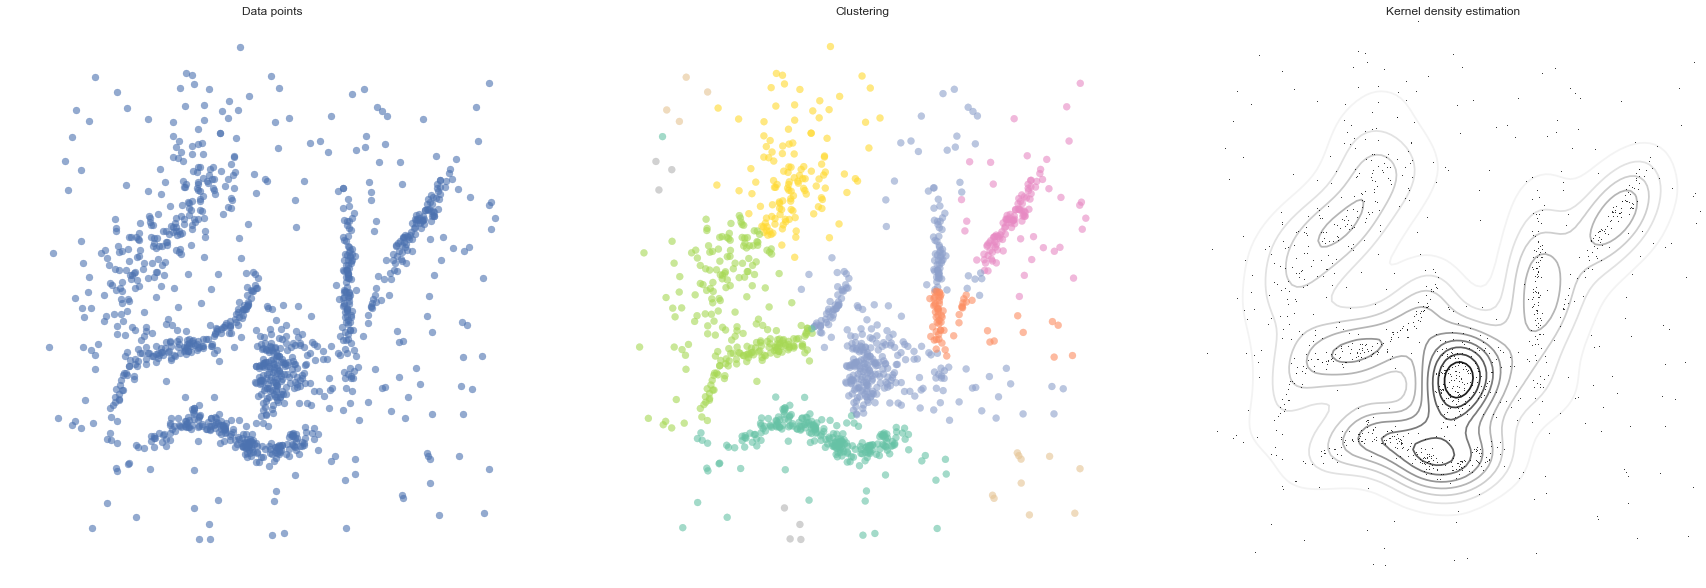

In [4]:
data = fuzzy
bandwidth = 0.23
ms = MeanShift(data, bandwidth)
ms.fit()
labels = ms._cluster_labels
bandwidth = ms._bandwidth   
outliers = ms._outliers 

plot_mean_shift(data, labels, bandwidth, outliers)

## Fuzzy C Means

In [5]:
def plot_fuzzy_cmeans(data, labels, Uk, c):
    f, axarr = plt.subplots(1,3, figsize=(30,10))
    axarr[0].scatter(data[:,0],data[:,1],alpha=.6)
    axarr[1].scatter(data[:,0],data[:,1],alpha=.6, c=labels, cmap='Set2')
    for i in range(c):
        axarr[2].scatter(data[:,0],data[:,1],alpha=.2,s = np.pi * (30 * Uk[i,:])**2)
    axarr[0].axis('off')
    axarr[1].axis('off')
    axarr[2].axis('off')
    axarr[0].set_title('Data points')
    axarr[1].set_title('Hard clustering')
    axarr[2].set_title('Fuzzy clustering')
    plt.show()

Finished after 0.2053782971157796
29 iterations until termination.
Max within cluster distance to center: 2.489318
Mean within cluster distance to center: 0.505892
Sum of within cluster squared errors: 422.327390


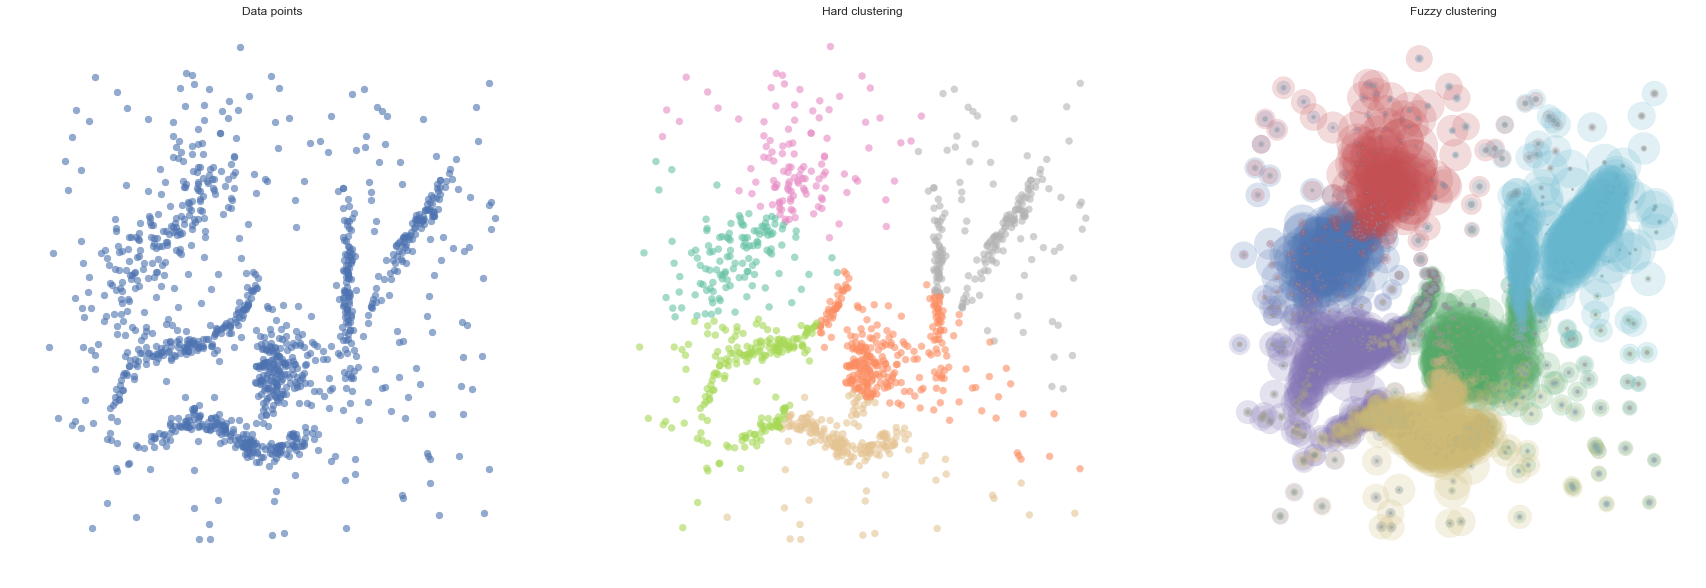

In [6]:
data = fuzzy
c=6
ms = FuzzyCMeans(data,c )
ms.fit()
labels = ms._cluster_labels
Uk = ms._membership 
plot_fuzzy_cmeans(data, labels, Uk, c)

### Clustering on different data sets

Comment: Ich würde sagen, dass wir tabellen und grafiken (siehe unten) einfach vorbereiten und abspeichern für präsentation und paper, das währrend der präsentation auszurechnen dauert einfach zu lange. 

In [16]:
def format_subplots():
    plt.figure(figsize=(30,10))
    ax1 = plt.subplot2grid((2,5), (0, 0))
    ax2 = plt.subplot2grid((2,5), (0, 1))
    ax3 = plt.subplot2grid((2,5), (0, 2))
    ax4 = plt.subplot2grid((2,5), (0, 3))
    ax5 = plt.subplot2grid((2,5), (0, 4))
    ax6 = plt.subplot2grid((2,5), (1,0), colspan=6)
    ax = [ax1,ax2, ax3, ax4, ax5]
    row_labels=[ 'Computing time [s]', '# of iterations',  '# of clusters', 'Mean cluster to center']
    column_labels=['Spiral','Aggregation','Compound', 'Fuzzy', 'Pathbased']
    return ax, row_labels, column_labels

In [8]:
spiral=load_spiral_data(scale = 'True')
aggr=load_aggregation_data(scale = 'True')
compound = load_compound_data(scale = 'True')
fuzzy = load_fuzzy_data(scale = 'True')
fuzzy = fuzzy[np.arange(0,2309,2),:]
pathbased = load_pathbased_data(scale = 'True')
dataset = [spiral, aggr, compound, fuzzy, pathbased]

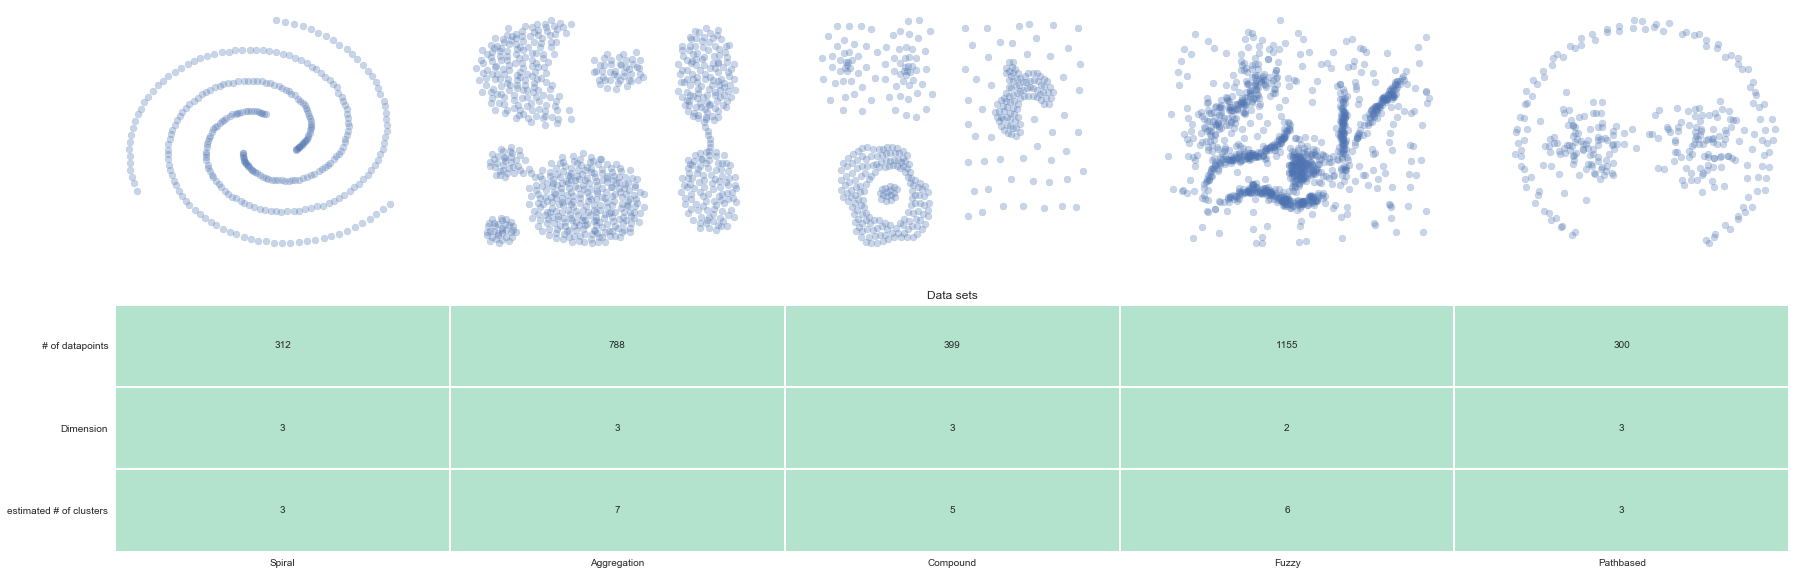

In [33]:
ax, row_labels, column_labels = format_subplots()
row_labels = ['       # of datapoints', 'Dimension', 'estimated # of clusters']
datasetresults = np.zeros((3,5))
for i in range(5):
    data = dataset[i]
    datasetresults[ 0,i] = int(np.size(data,0))
    datasetresults[ 1,i] = int(np.size(data,1))
    ax[i].scatter(data[:,0],data[:,1],alpha=.3)
    ax[i].axis('off')
datasetresults[2,:] = np.array([3,7,5,6,3])

df = pd.DataFrame(datasetresults[:,:],row_labels , column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=10000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="Pastel2")
plt.title('Data sets')
plt.show()

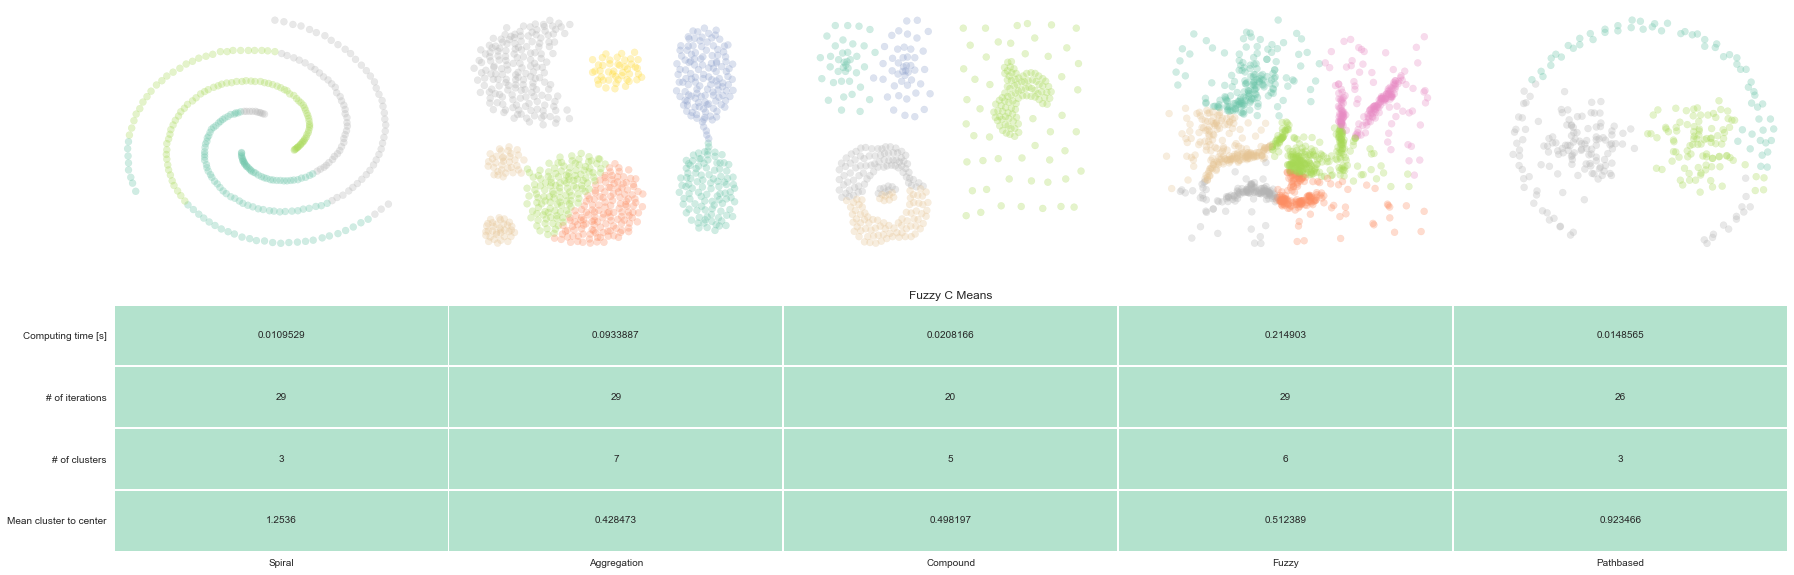

In [34]:
ax, row_labels, column_labels = format_subplots()
clusternumber= [3,7,5,6,3]
results = np.zeros((2,4,5))
for i in range(5):
    #results[0, 0,i] = int(np.size(dataset[i],0))
    #results[0, 1,i] = int(np.size(dataset[i],1))
    data = dataset[i]
    c=clusternumber[i]
    results[0, 2,i] = c
    f = FuzzyCMeans(data,c, verbose = False )
    f.fit()
    labels = f._cluster_labels
    results[0, 3,i] = np.mean(f._cluster_dist)
    results[0, 0,i] = f._time
    results[0, 1,i] = f._iter 
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')


df = pd.DataFrame(results[0,:,:], row_labels, column_labels)
ax6 = sns.heatmap(df,vmin=0, vmax=10000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="Pastel2")
plt.title('Fuzzy C Means')
plt.show()


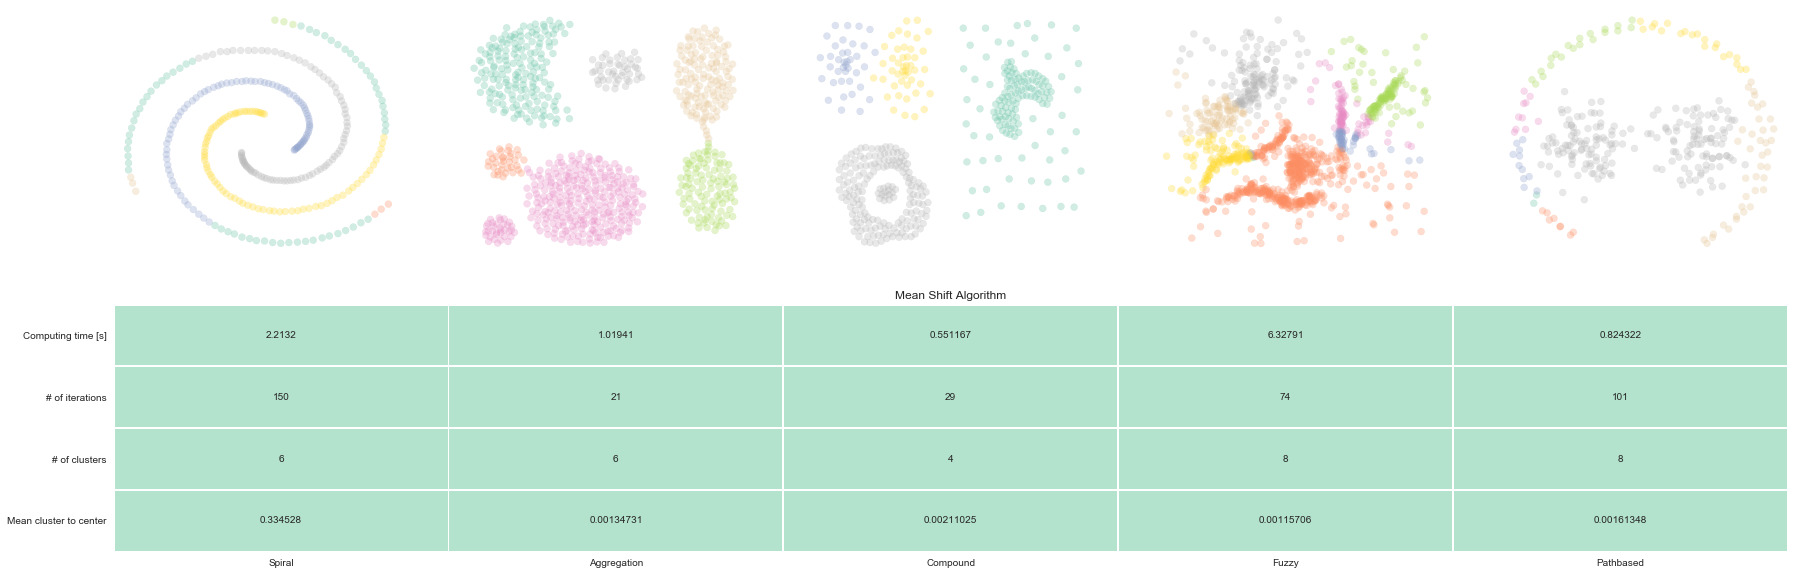

In [35]:
ax, row_labels, column_labels = format_subplots()

for i in range(5):
    #results[1,0,i] = int(np.size(dataset[i],0))
    #results[1,1,i] = int(np.size(dataset[i],1))
    data = dataset[i]
    ms = MeanShift(data, verbose = False)
    ms.fit()
    labels = ms._cluster_labels
    results[1,3,i] = np.mean(ms._cluster_dist)
    results[1,0,i] = ms._time
    results[1,1,i] = ms._iter 
    results[1,2,i] = max(labels)
    ax[i].scatter(data[:,0],data[:,1],alpha=.3, c = labels, cmap='Set2')
    ax[i].axis('off')

df = pd.DataFrame(results[1,:,:], row_labels, column_labels)

ax6 = sns.heatmap(df,vmin=0, vmax=10000, annot=True,cbar = False, fmt="g", linewidths=1, cmap="Pastel2")

plt.title('Mean Shift Algorithm')
plt.show()

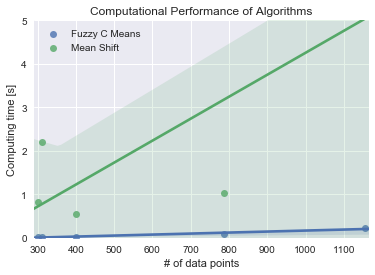

In [36]:
#not good because data has different dimensions, d=2 and 3
ax = sns.regplot(x=datasetresults[0,:], y=results[0,0,:],  label='Fuzzy C Means')
ax = sns.regplot(x=datasetresults[0,:], y=results[1,0,:],  label='Mean Shift')
plt.gca().axis([min(datasetresults[0,:])-10, max(datasetresults[0,:])+10, 0, 5])
plt.gca().set_xlabel('# of data points')
plt.gca().set_ylabel('Computing time [s]')
plt.title('Computational Performance of Algorithms')
plt.legend()
plt.show()

### Comparison of clustering algorithms